# Mount and Imports

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%cd gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/

/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2


In [11]:
!pip install -q pydicom
!pip install tqdm -q

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [12]:
import os
import glob
from tqdm import tqdm
import pydicom
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import json

# imports from file
from scripts.phase4 import *

# 1. Execute

In [ ]:
delete_masks('ok5', 1548638)

Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]


Reading: 0it [00:00, ?it/s]
Reading: 7it [00:00, 3186.47it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
Reading: 7it [00:00, 1429.41it/s]

[45, 42, 42, 31, 31, 22, 53, 38, 32, 38, 27, 14, 14, 10, 5, 14, 30, 50, 38, 31, 42, 25, 11, 5, 15, 25, 21, 14, 22, 18, 53, 48, 42, 40, 42, 42, 35, 31, 35, 18, 5, 48, 53, 45, 40, 18, 44, 133, 53, 48, 31, 18, 18, 179, 181, 113, 110, 50, 32, 21, 154, 220, 130, 44, 47, 30, 7, 14, 7, 30, 199, 104, 65, 40, 14, 7, 7, 11, 8, 2, 75, 35, 24, 126, 45, 14, 4, 14, 14, 5, 10, 22, 31, 179, 85, 31, 7, 14, 14, 4, 4, 35, 25, 127, 32, 8, 10, 14, 5, 14, 42, 11, 38, 15, 4, 10, 10, 4, 14, 61, 11, 21, 95, 10, 8, 5, 2, 10, 44, 7, 32, 14, 4, 10, 7, 21, 30, 24, 45, 70, 10, 8, 11, 15, 63, 60, 11, 30, 38, 113, 38, 8, 18, 14, 14, 48, 18, 27, 18, 113, 18, 1, 7, 14, 50, 21, 24, 2, 0, 1, 24, 54, 27, 18, 18, 0, 0, 7, 38, 31, 40, 35, 1, 0, 0, 38, 48, 104, 7, 0, 0, 21, 121, 54, 11, 4, 0, 8, 93, 22, 1, 0, 2, 55, 38, 0, 0, 0, 50, 63, 60, 0, 1, 4, 61, 60, 35, 42, 50, 7, 0, 7, 60, 55, 28, 42, 14, 11, 8, 47, 55, 60, 32, 14, 2, 4, 40, 53, 53, 10, 0, 2, 30, 47, 53, 138, 10, 7, 7, 35, 31, 58, 28, 18, 8, 18, 30, 70, 42, 14, 10, 


Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]

[62, 62, 51, 56, 78, 91, 94, 42, 36, 47, 56, 60, 54, 56, 85, 88, 65, 74, 95, 94, 42, 37, 30, 40, 47, 47, 47, 36, 54, 78, 54, 65, 71, 75, 51, 37, 34, 31, 34, 45, 56, 62, 54, 47, 74, 75, 94, 85, 56, 95, 141, 57, 75, 189, 227, 74, 156, 189, 74, 65, 226, 148, 94, 60, 60, 62, 233, 109, 112, 75, 45, 33, 183, 132, 121, 95, 47, 36, 19, 118, 48, 45, 45, 13, 179, 24, 33, 24, 4, 227, 65, 12, 25, 12, 10, 10, 12, 16, 19, 227, 4, 16, 12, 22, 12, 18, 13, 34, 197, 12, 6, 16, 19, 71, 6, 3, 7, 31, 50, 7, 0, 13, 1, 9, 71, 9, 6, 39, 9, 6, 12, 232, 236, 31, 6, 4, 98, 206, 1, 0, 71, 226, 3, 0, 57, 227, 217, 4, 51, 209, 3, 60, 7, 47, 112, 28, 6, 45, 74, 0, 10, 37, 68, 0, 0, 40, 60, 4, 6, 51, 39, 201, 7, 7, 50, 186, 6, 16, 10, 56, 9, 0, 19, 192, 6, 0, 47, 198, 88, 9, 0, 3, 189, 24, 4, 3, 22, 109, 132, 157, 166, 179, 10, 3, 6, 81, 85, 118, 144, 157, 170, 15, 6, 6, 75, 88, 81, 94, 138, 22, 12, 9, 65, 56, 45, 69, 138, 27, 6, 15, 9, 51, 36, 54, 91, 144, 37, 9, 0, 56, 39, 33, 54, 115, 132, 156, 94, 50, 7, 1, 10, 4

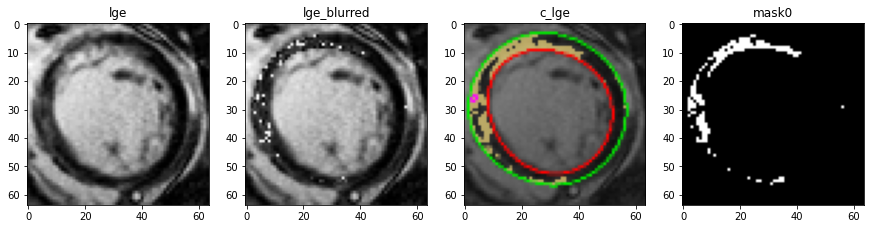

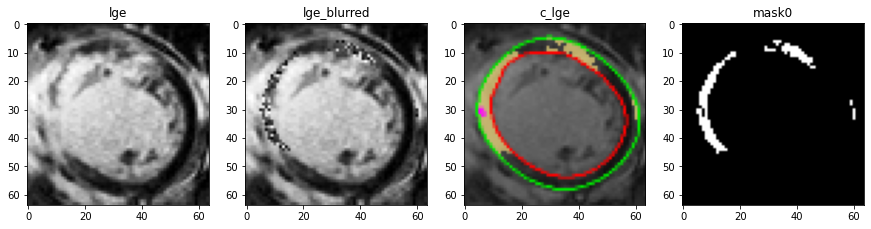

In [38]:
get_scar('ok5', 1548638, scar_color='yellow', intensity_mode='normal_distribution', intensity_med=0.5, save=False, show=True)

# Functions (no need to run)

In [13]:
def get_segment_cordinates(image, seg_color, show=True):
  cordinates = []
  img = image.copy()
  segment_pixel_nb = 0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      R, G, B = img[i][j]
      in_segment = check_color(seg_color, R, G, B) 
      if seg_color == 'yellow' or seg_color == 'blue':
        in_segment = in_segment or check_color('pink', R, G, B)
      if in_segment:
          img[i][j] = [255, 255, 255]
          segment_pixel_nb += 1
          cordinates.append((i, j))
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image, cmap='gray')
    ax2.imshow(img, cmap='gray')
    if seg_color == 'yellow':
      ax1.set_title("orginal")
      ax2.set_title("scar")
  return cordinates

def check_color(color, R, G, B):
  if color == 'green' and (G - R) > 100 and (G - B) > 100:
    return True
  if color == 'red' and R>B and R > G + 100 and R > B + 100:
    return True
  if (color == 'blue') and (B>G)  and (B>R) and (R>100) and (B>100) and (G>100):
    return True  
  if color == 'yellow' and abs(R - G) < 50 and (R - B) > 50 and (G - B) > 50:
    return True
  if color == 'pink' and abs(R - B) < 50 and R > 200 and B > 200 and G < 60:
    return True
  return False

In [14]:
def is_in(x, y, cordinates, treshold=0):
  TR, TL, BR, BL = get_surrounding(x, y, cordinates)
  if len(TR) > treshold and len(TL) > treshold and len(BR) > treshold and len(BL) > treshold:
    return True
  return False

def get_surrounding(x, y, cordinates):
  top_right = []
  top_left = []
  bottom_right = []
  bottom_left = []
  for i, j in cordinates:
    if x-i > 0 and y-j < 0:
      top_right.append((i, j))
    elif x-i > 0 and y-j > 0:
      top_left.append((i, j))
    elif x-i < 0 and y-j < 0:
      bottom_right.append((i, j))
    elif x-i < 0 and y-j > 0:
      bottom_left.append((i, j))
  return top_right, top_left, bottom_right, bottom_left

In [15]:
def get_pixels_in_contour(image, contour_color, show=True):
  img = image.copy()
  contour_cords = get_segment_cordinates(img, contour_color, show=False)
  sorted_by_i = sorted(contour_cords, key=lambda x: x[0])
  min_i = sorted_by_i[0][0]
  max_i = sorted_by_i[-1][0]
  sorted_by_j = sorted(contour_cords, key=lambda x: x[1])
  min_j = sorted_by_j[0][1]
  max_j = sorted_by_j[-1][1]
  inside_contour_cords = []
  for i in range(min_i, max_i + 1):
    for j in range(min_j, max_j + 1):
      if is_in(i, j, contour_cords):
        inside_contour_cords.append((i, j))
        img[i][j] = [0, 0, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("inside")
  return inside_contour_cords

In [16]:
def get_pixels_between_contours(image, show=True):
  img = image.copy()
  green_contour_cords = get_segment_cordinates(img, 'green', show=False)
  red_contour_cords = get_segment_cordinates(img, 'red', show=False)
  sorted_by_i = sorted(green_contour_cords, key=lambda x: x[0])
  min_i = sorted_by_i[0][0]
  max_i = sorted_by_i[-1][0]
  sorted_by_j = sorted(green_contour_cords, key=lambda x: x[1])
  min_j = sorted_by_j[0][1]
  max_j = sorted_by_j[-1][1]
  between_contours_cords = []
  for i in range(min_i, max_i + 1):
    for j in range(min_j, max_j + 1):
      if is_in(i, j, green_contour_cords) and not is_in(i, j, red_contour_cords):
        if (i, j) not in red_contour_cords:
          between_contours_cords.append((i, j))
          img[i][j] = [255, 255, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("between")
  return between_contours_cords

In [17]:
def get_healthy(image, scar_color='yellow', show=True):
  img = image.copy()
  between = get_pixels_between_contours(img, show=show)
  scar = get_segment_cordinates(img, scar_color, show=show)
  healthy = []
  for cord in between:
    if cord not in scar:
      healthy.append(cord)
      i, j = cord
      img[i][j] = [255, 255, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("healty")
  return healthy

In [34]:
def get_scar_binary_mask(c_lge, scar_color='yellow'):
  if c_lge.shape != (64, 64, 3):
    print('image shape must be 64*64!!')
    return
  mask = np.zeros((64, 64, 3), dtype=np.uint8)
  scar = get_segment_cordinates(c_lge, scar_color, show=False)
  for i, j in scar:
    mask[i][j] = [255, 255, 255]
  return mask

def get_substitude_intensity(lge, c_lge, mode, med=0.5, scar_color='yellow'):
  if mode == 'normal_distribution':
    return get_substitude_intensity_normal_distribution(lge, c_lge, scar_color)
  if mode == 'avg_between':
    return get_substitude_intensity_avg_between(lge, c_lge, scar_color)
  if mode == 'avg_inside':
    return get_substitude_intensity_avg_inside(lge, c_lge, scar_color)
  if mode == 'med_between':
    return get_substitude_intensity_med_between(lge, c_lge, med, scar_color)

def get_substitude_intensity_normal_distribution(lge, c_lge, scar_color='yellow'):
  healthy = get_healthy(c_lge, scar_color=scar_color, show=False)
  healthy_intensities = []
  for i, j in healthy:
    healthy_intensities.append(lge[i][j])
  healthy_mean = np.mean(healthy_intensities)
  healthy_var = np.var(healthy_intensities)
  print(healthy_intensities)
  return healthy_mean, np.sqrt(healthy_var)

def get_substitude_intensity_avg_between(lge, c_lge, scar_color='yellow'):
  healthy = get_healthy(c_lge, scar_color=scar_color, show=False)
  sub_intensity = 0
  for i, j in healthy:
    sub_intensity += lge[i][j] 
  sub_intensity /= len(healthy)
  return int(sub_intensity)

def get_substitude_intensity_med_between(lge, c_lge, med, scar_color='yellow'):
  healthy = get_healthy(c_lge, scar_color=scar_color, show=False)
  intensities = []
  for i, j in healthy:
    intensities.append(lge[i][j])
  intensities = sorted(intensities, key=lambda x: x)
  return intensities[int((len(intensities) - 1) * med)]

def get_substitude_intensity_avg_inside(lge, c_lge, scar_color='yellow'):
  inside_red_contour = get_pixels_in_contour(c_lge, 'red', show=False)
  substitude_intensity = 0
  for i, j in inside_red_contour:
    substitude_intensity += lge[i][j] 
  substitude_intensity /= len(inside_red_contour)
  return int(substitude_intensity)

In [37]:
def get_scar(category, patient_num, scar_color='yellow', intensity_mode='avg_between', intensity_med=0.5, save=False, show=True):
  
  '''
  shows binary mask for all folders of a patient.
  saves binary mask, with substitude intensity as the last part of the saved file.
  if scar is blue, scar_color should be set to 'blue'.

  types of intensity_mode: 'avg_between', 'avg_inside', 'med_between'
  '''

  main_path = './dataset/' + category + '/' + str(patient_num) + '/'
  for folder_num in range(1, 10):
    root = main_path + str(folder_num) + '/results/'
    finished = True
    for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
      finished = False
      if ('_c_lge.png' in path):
        c_lge_path = path
      elif ('img' in path and '_lge.png' in path):
        lge_path = path
    if finished:
      continue
    lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
    c_lge = cv2.cvtColor(cv2.imread(c_lge_path), cv2.COLOR_RGB2BGR)
    mask = get_scar_binary_mask(c_lge, scar_color)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    intensity = 0
    if intensity_mode == 'normal_distribution':
      substitudes = []
      mu, sigma = get_substitude_intensity(lge, c_lge, mode=intensity_mode, med=intensity_med, scar_color=scar_color)
      lge_blurred = lge.copy()
      for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
          if mask[i][j] == 255:
            substitudes.append(np.random.normal(mu, sigma, 1)[0])
            lge_blurred[i][j] = substitudes[-1]
      print(substitudes)   
    else:
      intensity = get_substitude_intensity(lge, c_lge, mode=intensity_mode, med=intensity_med, scar_color=scar_color)
      lge_blurred = lge.copy()
      for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
          if mask[i][j] == 255:
            lge_blurred[i][j] = intensity

    if show:
      fig , (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 15))
      ax1.imshow(lge, cmap='gray')
      ax2.imshow(lge_blurred, cmap='gray')
      ax3.imshow(c_lge, cmap='gray')
      ax4.imshow(mask, cmap='gray')
      ax1.set_title("lge")
      ax2.set_title("lge_blurred")
      ax3.set_title("c_lge")
      ax4.set_title("mask" + str(intensity))

    if save:
      dest = root + 'mask_' + str(intensity) + '.png'
      with open(dest, 'wb') as png_file:
        cv2.imwrite(dest, cv2.cvtColor(mask, cv2.COLOR_RGB2BGR))
      print()
      print('saved:', dest)

In [20]:
def delete_masks(category, patient_num):
  main_path = './dataset/' + category + '/' + str(patient_num) + '/'
  for folder_num in range(1, 10):
    root = main_path + str(folder_num) + '/results/'
    finished = True
    for path in tqdm(glob.iglob(root + '**/mask*.png' , recursive=True) , desc = "Reading"):
      finished = False
      mask_path = path
    if finished:
      continue
    os.remove(mask_path)